In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
import pickle
import pandas as pd
%matplotlib inline

In [2]:
import seaborn as sns

In [179]:
plt.style.use('seaborn-white', )
plt.rcParams['axes.labelsize'] =  25
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0


# Examine the Fisher info of orientation as a function of epoch while training an ImageNet network
##### Here AlexNet

In [3]:
folder = 'fisher_alexnet_layer2'

In [20]:
epochs = !ls $folder/
all_fishers = {}
for i, pickled_fisher in enumerate(epochs):
    epoch = pickled_fisher.split('_')[2].split('.')[0]
    fisher = [o.item() for o in pickle.load(open(folder +'/'+pickled_fisher,'rb'))]
    all_fishers[int(epoch)] = np.sqrt(fisher)

In [21]:
all_fishers = pd.DataFrame(all_fishers).sort_index(axis=1)
all_fishers.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,3131.571490,5189.497856,25472.743708,31504.307769,29605.424368,32199.855900,33838.373483,32886.566741,33410.089973,35119.190879,...,41921.584703,42071.185389,42177.679784,42294.814434,42452.106850,42313.806730,42512.823477,42439.827332,42665.238309,42838.057099
1,3137.905990,5071.021199,24399.748195,29273.557761,28830.870122,32340.480640,33494.609954,32758.379447,32279.931598,33461.357773,...,40338.245078,40562.827515,40569.180815,40749.526427,40831.047011,40839.304989,41000.667312,41027.865653,41081.582053,41237.868422
2,3083.089035,4850.608828,23545.632291,28536.998020,27571.325394,30719.407286,32122.803365,31289.381713,30507.423883,32516.933681,...,38086.886772,38263.703114,38276.499735,38466.638845,38571.221604,38505.835817,38695.172205,38707.945231,38706.784522,38938.204992
3,3066.627137,4541.630324,22129.430901,26535.433217,26477.207103,28915.526072,30282.321708,29377.307160,29181.534984,30638.305958,...,36336.820775,36506.695495,36510.394356,36713.730184,36771.676056,36691.734655,36948.628554,36897.873326,36950.180514,37147.979111
4,3070.362194,4397.800359,20447.978091,24277.779141,24314.494114,26607.345753,28455.327515,27327.774004,27091.250839,28394.923490,...,35068.324625,35259.364487,35260.034260,35441.119621,35554.430160,35419.038496,35657.316556,35663.409596,35746.914832,35914.297988


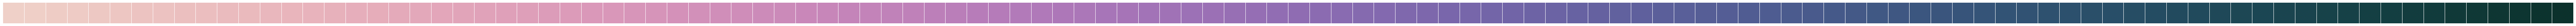

In [22]:
cs = sns.cubehelix_palette(len(all_fishers), hue = 0.9, start = 5, rot=0.8)
sns.palplot(cs)

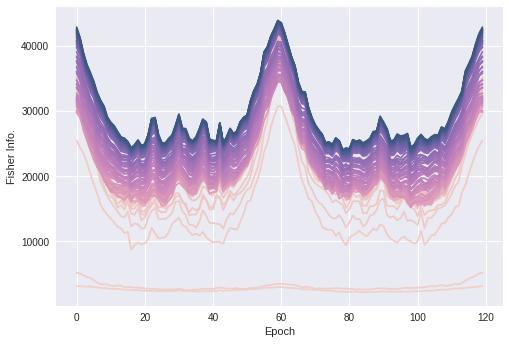

In [25]:
for c in all_fishers:
    plt.plot(all_fishers[c],c=cs[int(c)], label = c)
# plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.show()

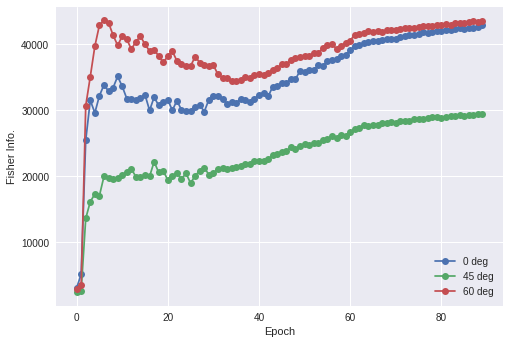

In [24]:
plt.plot(all_fishers.iloc[0,:],"-o", label = "0 deg")
plt.plot(all_fishers.iloc[30,:],"-o", label = "45 deg")
plt.plot(all_fishers.iloc[60,:],"-o", label = "60 deg")
plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.legend()
plt.show()

# Now for layer 3

In [37]:
folder = 'fisher_alexnet_layer3'

In [38]:
epochs = !ls $folder/
all_fishers = {}
for i, pickled_fisher in enumerate(epochs):
    try:
        epoch = float(pickled_fisher.split('_')[2].split('.')[0]) +\
                    float("."+pickled_fisher.split('_')[2].split('.')[2])
    except:
        continue
    fisher = [o.item() for o in pickle.load(open(folder +'/'+pickled_fisher,'rb'))]
    all_fishers[float(epoch)] = np.sqrt(fisher)
all_fishers = pd.DataFrame(all_fishers).sort_index(axis=1)
all_fishers.head()


,0.0,0.1997602876548142,0.3995205753096284,0.5992808629644427,0.7990411506192568,0.9988014382740711,1.0,1.1997602876548141,1.3995205753096285,1.5992808629644428,...,88.39952057530962,88.59928086296445,88.79904115061926,88.99880143827407,89.0,89.19976028765481,89.39952057530962,89.59928086296445,89.79904115061926,89.99880143827407
0,3131.471539,2992.778642,2619.427800,2010.246440,2724.345518,5331.562623,4725.501878,9332.287179,12944.253397,18633.932918,...,42649.078208,42782.390396,42884.272921,42841.092797,42834.876258,42975.317939,42895.501676,42872.055981,42919.009122,42936.531392
1,3137.849582,2990.696407,2600.315942,1979.307707,2683.564421,5089.864242,4629.316580,8472.463160,12266.003750,17297.350549,...,41142.739238,41238.233134,41342.665613,41242.936850,41233.533538,41348.334138,41310.771477,41234.204054,41396.044642,41336.234565
2,3082.939182,2923.780772,2564.916665,1957.479502,2628.799821,4891.097218,4412.298494,7936.759288,11673.916224,16420.250912,...,38809.090894,38914.101917,38982.121030,38937.861472,38935.788781,38992.485840,38942.159365,38916.193853,39053.902443,39059.896569
3,3066.530776,2914.050103,2529.629617,1938.085976,2587.313665,4641.386862,4142.211004,7441.446096,11525.507017,15540.332043,...,37102.314753,37140.851040,37192.141966,37153.350535,37145.646313,37233.206684,37232.042974,37198.365555,37242.528808,37299.411255
4,3070.251781,2921.071036,2542.273982,1950.039743,2584.452747,4483.452464,4046.931924,7062.579132,10786.639885,14735.602601,...,35790.809100,35866.042324,35953.651942,35918.257419,35908.919449,35968.067616,35940.437838,35895.006004,35967.649464,35985.518865
5,2997.963475,2861.880064,2496.025541,1924.451415,2537.810080,4259.746941,3754.678415,6576.229315,10339.329959,13790.865963,...,34476.729311,34550.302343,34612.471278,34592.573538,34579.990515,34609.159481,34636.260306,34603.835163,34688.832093,34698.229119
6,2937.067926,2791.347793,2429.312248,1894.125260,2423.035699,3935.616724,3378.541697,5767.913834,9518.122924,12646.982881,...,32767.859375,32773.790504,32852.344574,32865.335903,32844.500544,32879.756690,32898.141954,32880.768847,32927.725946,32951.268746
7,2875.632974,2737.968773,2326.371316,1823.900354,2298.621761,3613.906197,3184.098617,5270.601104,9000.624423,11742.638204,...,31649.261856,31647.056609,31658.800988,31646.428677,31627.098255,31712.421793,31673.706446,31712.133199,31697.960565,31744.328627
8,2844.780396,2734.097657,2356.313965,1847.595464,2329.161759,3585.124684,3199.344620,4851.162747,8562.055828,10871.923841,...,30759.363322,30751.281990,30797.676795,30765.420589,30744.765018,30797.749528,30825.884188,30834.918388,30812.739184,30828.566493
9,2796.170685,2704.661162,2365.768902,1840.741698,2320.191802,3538.656242,3180.388655,4505.400981,8097.361546,10448.804716,...,29043.477478,29065.258437,29122.773494,29086.632531,29074.335624,29157.325529,29150.706887,29121.446118,29109.867468,29139.995333


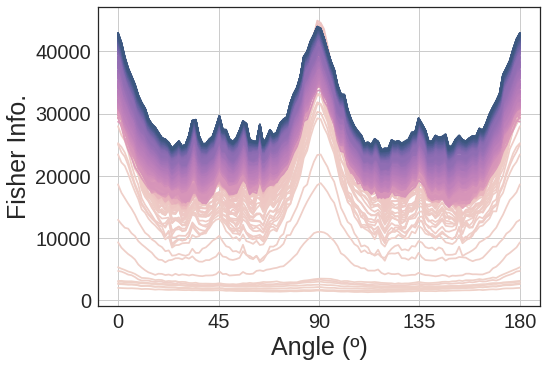

In [94]:
for c in all_fishers.columns:
#     print(c)
    plt.plot(np.linspace(0, 180, 120), all_fishers[c],c=cs[int(c)], label = c)
# plt.legend()
plt.xticks(np.linspace(0, 180, 5))
plt.xlabel("Angle (º)")
plt.grid()
plt.ylabel("Fisher Info.")
plt.tight_layout()
plt.savefig("figures/Alexnet_fisher_L3.pdf")
plt.show()

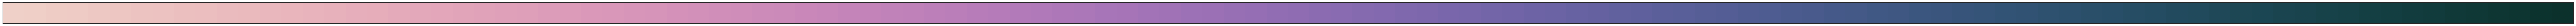

In [76]:
sns.palplot(cs)
plt.savefig("figures/epoch_scale.pdf")

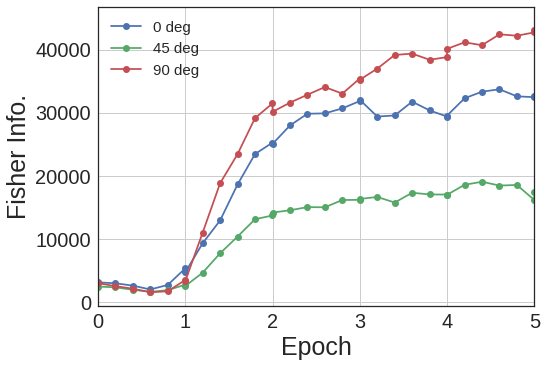

In [95]:
plt.plot(all_fishers.iloc[0,:],"-o", label = "0 deg")
plt.plot(all_fishers.iloc[120//4,:],"-o", label = "45 deg")
plt.plot(all_fishers.iloc[120//2,:],"-o", label = "90 deg")
plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.xlim([0,5])
plt.grid()
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig("figures/Alexnet_Fishers_L3_vs_time_5.pdf")
plt.show()

In [88]:
all_fishers.shape

(120, 540)

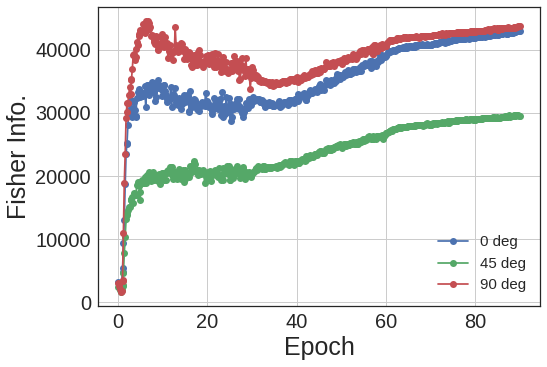

In [96]:
plt.plot(all_fishers.iloc[0,:],"-o", label = "0 deg")
plt.plot(all_fishers.iloc[120//4,:],"-o", label = "45 deg")
plt.plot(all_fishers.iloc[120//2,:],"-o", label = "90 deg")

plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.grid()
plt.legend(fontsize = 15)
plt.tight_layout()

plt.savefig("figures/Alexnet_Fishers_L3_vs_time.pdf")
plt.show()

# Now for things rotated by 45 deg

In [3]:
folder = 'fisher_alexnet_layer3_rotated'

In [4]:
epochs = !ls $folder/
all_fishers = {}
for i, pickled_fisher in enumerate(epochs):
    if pickled_fisher.split('_')[0] == 'fisher':
        epoch = pickled_fisher.split('_')[2].split('.')[0]
        fisher = [o.item() for o in pickle.load(open(folder +'/'+pickled_fisher,'rb'))]
        all_fishers[int(epoch)] = np.sqrt(fisher)

In [5]:
all_fishers = pd.DataFrame(all_fishers).sort_index(axis=1)
all_fishers.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,2634.603765,24502.102440,37529.687449,34535.228159,32074.826516,33816.441918,33374.456340,37259.269773,36209.429932,34838.904231,...,50619.286759,51001.603112,51281.652391,51230.773252,51441.450679,51491.731375,51726.871624,52090.574656,52003.640488,52072.810564
1,2600.350938,23561.420670,36314.457727,33769.983358,29916.064982,31525.321378,31521.346164,35280.527887,35214.378881,33418.465794,...,48122.640659,48368.555736,48600.915876,48713.849201,48789.186999,48955.395862,49020.900685,49315.200415,49245.892093,49488.892329
2,2503.410274,21552.333331,33703.366716,31671.840363,28728.943454,30675.034800,29992.041611,33536.488546,33458.999387,32043.775059,...,45522.075172,45767.505678,45954.694907,46059.350929,46067.744204,46193.723556,46313.969901,46587.604188,46629.808835,46769.518963
3,2479.695344,19803.527767,31215.430031,30246.496657,27806.551171,28955.867108,28684.353366,32502.656138,32386.426787,30749.930211,...,43775.190051,43845.414264,44001.727966,44122.372375,44247.103950,44386.134051,44505.292090,44733.107203,44716.402002,44917.337766
4,2436.744344,18244.185485,28856.171887,29167.636860,26754.284591,27901.322119,27730.768471,30859.367200,30906.748001,29346.315067,...,41312.189000,41422.711452,41627.061967,41666.400852,41709.069326,41885.724919,41896.636237,42209.595118,42195.476535,42330.143208


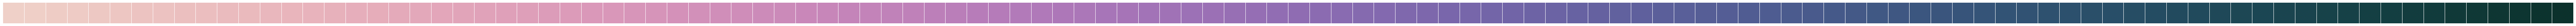

In [6]:
cs = sns.cubehelix_palette(len(all_fishers), hue = 0.9, start = 5, rot=0.8)
sns.palplot(cs)

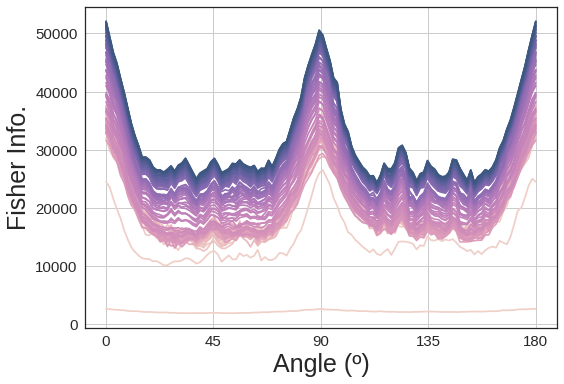

In [13]:
for c in all_fishers.columns:
#     print(c)
    plt.plot(np.linspace(0, 180, 120), all_fishers[c],c=cs[int(c)], label = c)
# plt.legend()
plt.xticks(np.linspace(0, 180, 5))
plt.xlabel("Angle (º)")
plt.grid()
plt.ylabel("Fisher Info.")
plt.tight_layout()
# plt.savefig("figures/Alexnet_fisher_L3.pdf")
plt.show()

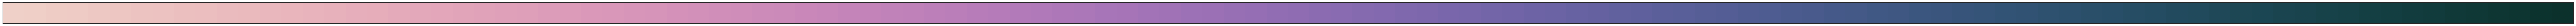

In [76]:
sns.palplot(cs)
plt.savefig("figures/epoch_scale.pdf")

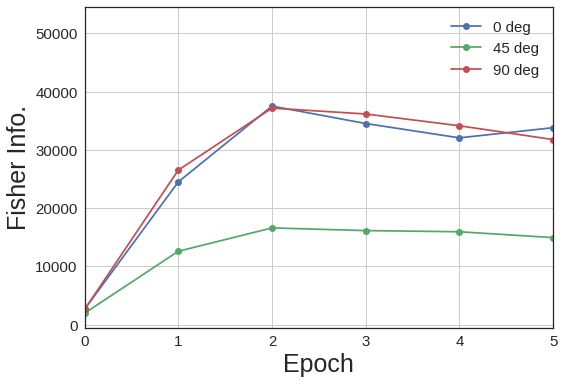

In [14]:
plt.plot(all_fishers.iloc[0,:],"-o", label = "0 deg")
plt.plot(all_fishers.iloc[120//4,:],"-o", label = "45 deg")
plt.plot(all_fishers.iloc[120//2,:],"-o", label = "90 deg")
plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.xlim([0,5])
plt.grid()
plt.legend(fontsize = 15)
plt.tight_layout()
# plt.savefig("figures/Alexnet_Fishers_L3_vs_time_5.pdf")
plt.show()

In [88]:
all_fishers.shape

(120, 540)

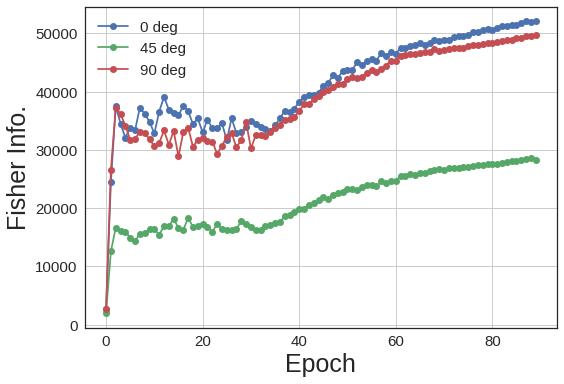

In [15]:
plt.plot(all_fishers.iloc[0,:],"-o", label = "0 deg")
plt.plot(all_fishers.iloc[120//4,:],"-o", label = "45 deg")
plt.plot(all_fishers.iloc[120//2,:],"-o", label = "90 deg")

plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.grid()
plt.legend(fontsize = 15)
plt.tight_layout()

# plt.savefig("figures/Alexnet_Fishers_L3_vs_time.pdf")
plt.show()

In [ ]:
folder = 'fisher_alexnet_layer2_rotated'

In [47]:
epochs = !ls $folder/
all_fishers = {}
for i, pickled_fisher in enumerate(epochs):
    if pickled_fisher.split('_')[0] == 'fisher':
        epoch = pickled_fisher.split('_')[2].split('.')[0]
        fisher = [o.item() for o in pickle.load(open(folder +'/'+pickled_fisher,'rb'))]
        all_fishers[int(epoch)] = np.sqrt(fisher)

In [48]:
all_fishers = pd.DataFrame(all_fishers).sort_index(axis=1)
all_fishers.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,4132.774613,13925.419060,20363.908466,20832.006144,20804.459522,21301.015187,21467.220034,20920.698268,37595.039673,29268.211835,...,26246.250475,26683.503218,27059.318543,27394.726500,27879.193102,28167.839818,28543.147969,28826.537773,29054.366694,29355.515734
1,4088.585330,13591.141821,20435.312966,21114.603856,21087.652501,21446.226708,21572.865920,21134.114980,36867.574479,28701.901819,...,26136.347717,26569.599470,26985.587857,27304.663338,27695.334481,28040.730376,28378.368100,28607.668902,28913.931313,29223.548860
2,3989.691592,13212.476528,19898.988919,20517.889170,20563.319576,20740.939227,20896.802435,20490.551188,36011.635453,28035.536307,...,25553.438908,25971.413208,26414.519644,26739.419291,27139.949005,27470.306296,27769.502696,28007.725791,28276.508978,28561.128269
3,3950.036582,13038.247735,19715.442070,20436.986079,20446.190843,20675.098065,20863.406433,20490.425471,35297.918352,27479.895196,...,25393.194679,25817.627467,26252.221544,26546.109621,26958.606492,27289.408348,27601.688064,27849.477697,28118.984903,28394.417479
4,3891.401547,12780.744266,19493.776648,20144.637003,20280.069428,20665.864415,20846.296937,20505.365542,34377.566639,26763.388724,...,25741.492731,26148.587113,26583.412573,26912.304398,27328.694371,27708.705347,27969.755094,28259.166301,28525.143996,28795.188487


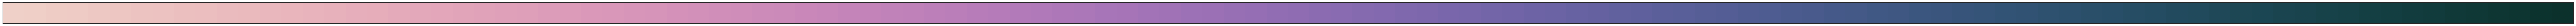

In [49]:
cs = sns.cubehelix_palette(len(all_fishers), hue = 0.9, start = 5, rot=0.8)
sns.palplot(cs)

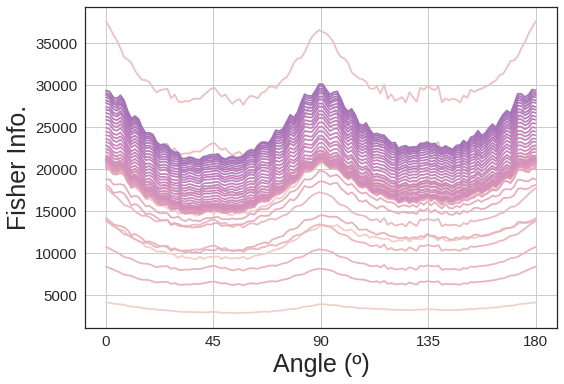

In [50]:
for c in all_fishers.columns:
#     print(c)
    plt.plot(np.linspace(0, 180, 120), all_fishers[c],c=cs[int(c)], label = c)
# plt.legend()
plt.xticks(np.linspace(0, 180, 5))
plt.xlabel("Angle (º)")
plt.grid()
plt.ylabel("Fisher Info.")
plt.tight_layout()
# plt.savefig("figures/Alexnet_fisher_L3.pdf")
plt.show()

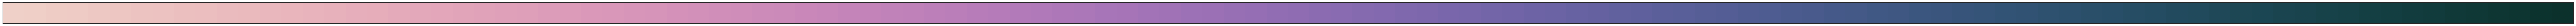

In [76]:
sns.palplot(cs)
plt.savefig("figures/epoch_scale.pdf")

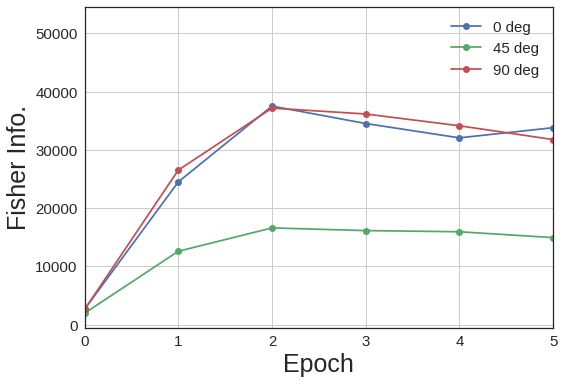

In [14]:
plt.plot(all_fishers.iloc[0,:],"-o", label = "0 deg")
plt.plot(all_fishers.iloc[120//4,:],"-o", label = "45 deg")
plt.plot(all_fishers.iloc[120//2,:],"-o", label = "90 deg")
plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.xlim([0,5])
plt.grid()
plt.legend(fontsize = 15)
plt.tight_layout()
# plt.savefig("figures/Alexnet_Fishers_L3_vs_time_5.pdf")
plt.show()

In [88]:
all_fishers.shape

(120, 540)

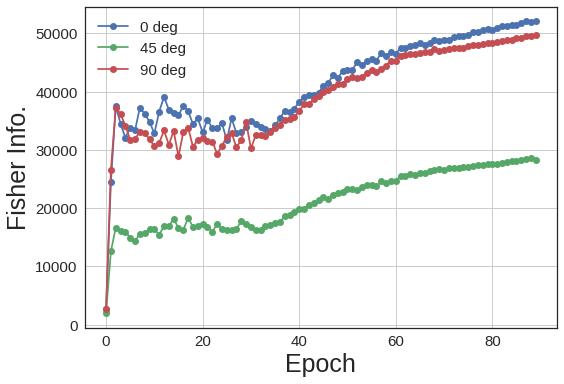

In [15]:
plt.plot(all_fishers.iloc[0,:],"-o", label = "0 deg")
plt.plot(all_fishers.iloc[120//4,:],"-o", label = "45 deg")
plt.plot(all_fishers.iloc[120//2,:],"-o", label = "90 deg")

plt.xlabel("Epoch")
plt.ylabel("Fisher Info.")
plt.grid()
plt.legend(fontsize = 15)
plt.tight_layout()

# plt.savefig("figures/Alexnet_Fishers_L3_vs_time.pdf")
plt.show()

## Unit tests

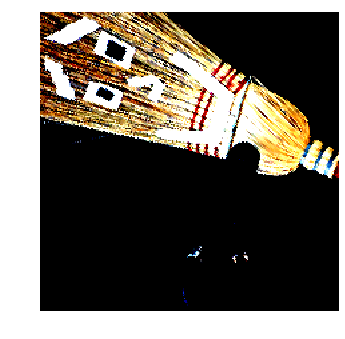

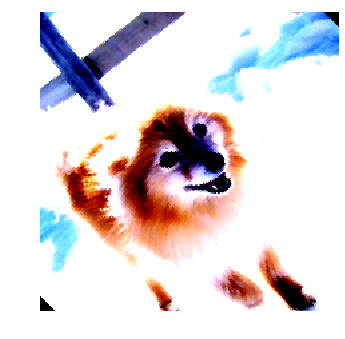

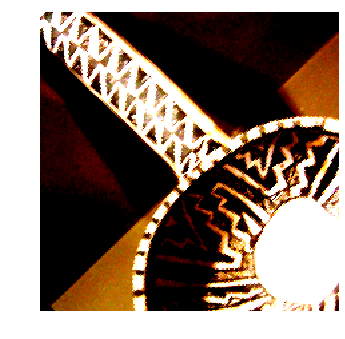

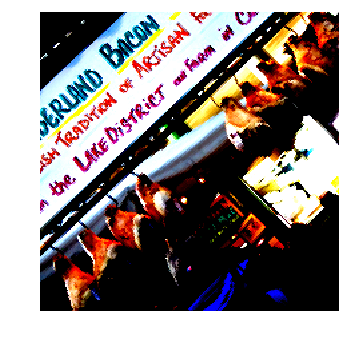

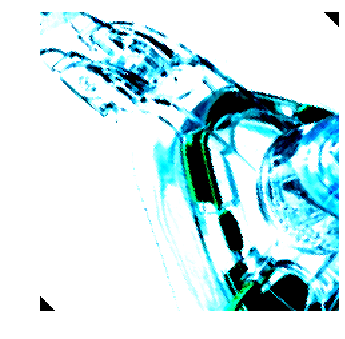

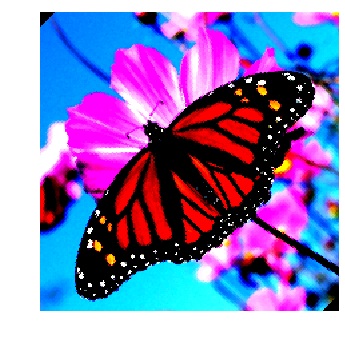

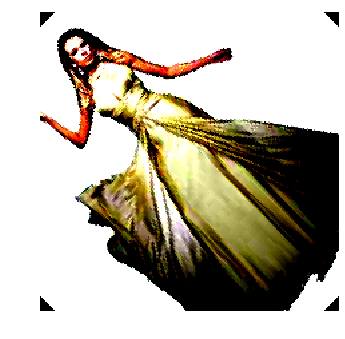

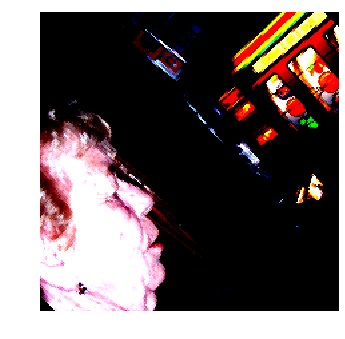

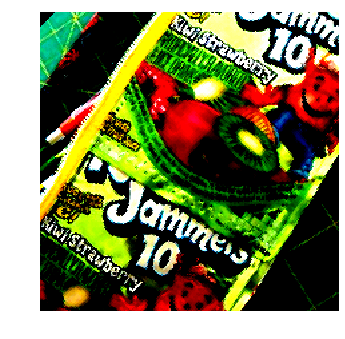

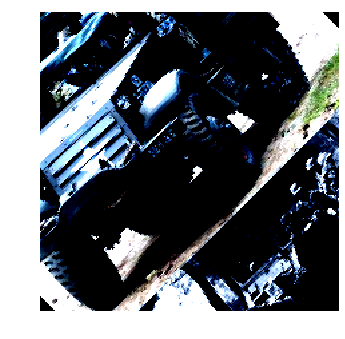

In [51]:
for i in range(10):
    plt.imshow(plt.imread("unit_tests/rotated_imgs/{}.png".format(i)))
    plt.axis('off')
    plt.show()

In [8]:
import sys
sys.path.insert(1, '../single_patch_orientation')
from orientation_stim import broadband_noise

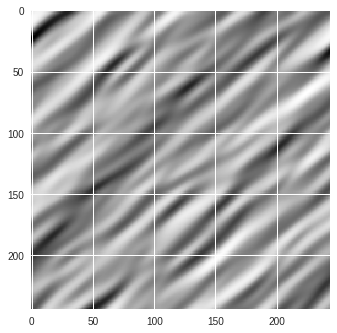

In [42]:
im = broadband_noise(size=244, 
                    orientation=40/180*np.pi, )
plt.imshow(im)

(-0.5, 223.5, 223.5, -0.5)

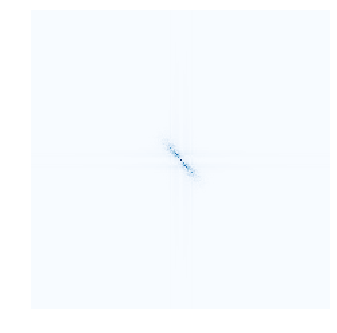

In [62]:
plt.imshow(np.load("test_fft_sin.npy"), cmap = "Blues")
plt.axis("Off")

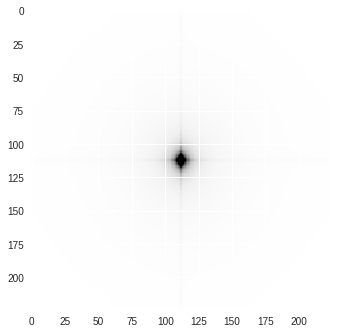

In [97]:
unshifted = np.load("ffts_unrotated/all_mean_fft_unshifted.npy")
shifted = np.fft.fftshift(unshifted)
plt.imshow(shifted, vmax = 500)

In [113]:
def get_circle(im, radius = 24, tol = 1):
    theta = []
    value = []
    c = int(im.shape[0]/2)
    for i, row in enumerate(im):
        for j, pixel in enumerate(row):
            r = np.sqrt((c-i)**2+(c-j)**2)
            if np.abs(r-radius) < tol:
                th = np.arctan2(c-i,c-j)
                theta.append(th)
                value.append(pixel)
    return theta,value

In [99]:
theta,value = get_circle(np.fft.fftshift(unshifted))

In [100]:
from scipy.stats import binned_statistic

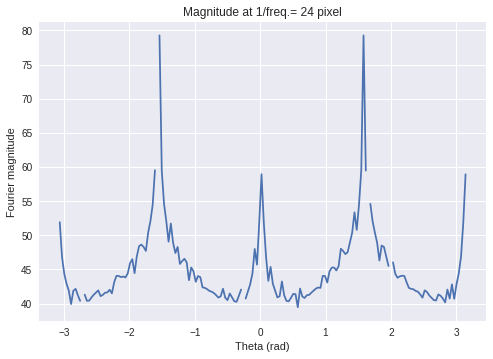

In [101]:
binned_value, binned_theta, _ = binned_statistic(theta,value,bins = 180)
plt.plot(binned_theta[1:],binned_value)
plt.xlabel("Theta (rad)")
plt.title("Magnitude at 1/freq.= 24 pixel")
plt.ylabel("Fourier magnitude")

### Now on rotated images

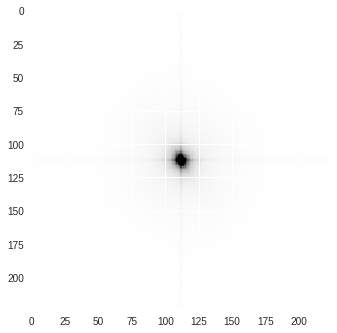

In [103]:
unshifted = np.load("ffts_rotated_30/all_mean_fft_unshifted.npy")
shifted = np.fft.fftshift(unshifted)
plt.imshow(shifted, vmax = 500)

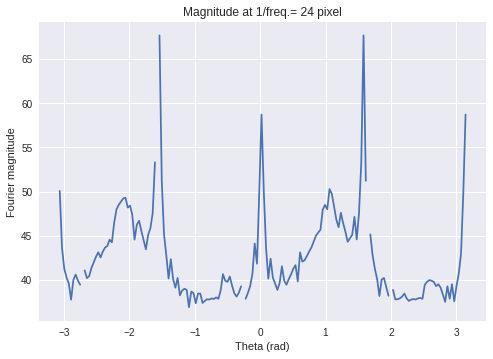

In [104]:
theta,value = get_circle(np.fft.fftshift(unshifted))
binned_value, binned_theta, _ = binned_statistic(theta,value,bins = 180)
plt.plot(binned_theta[1:],binned_value)
plt.xlabel("Theta (rad)")
plt.title("Magnitude at 1/freq.= 24 pixel")
plt.ylabel("Fourier magnitude")

## 45 degrees

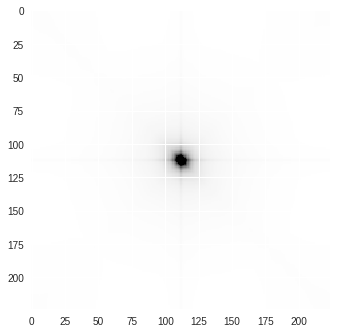

In [105]:
unshifted = np.load("ffts_rotated_45/all_mean_fft_unshifted.npy")
shifted = np.fft.fftshift(unshifted)
plt.imshow(shifted, vmax = 500)

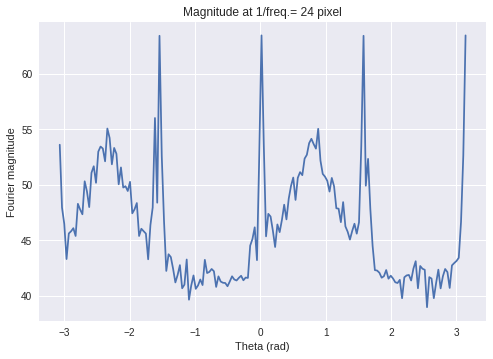

In [110]:
theta,value = get_circle(np.fft.fftshift(unshifted), tol = 3)
binned_value, binned_theta, _ = binned_statistic(theta,value,bins = 180)
plt.plot(binned_theta[1:],binned_value)
plt.xlabel("Theta (rad)")
plt.title("Magnitude at 1/freq.= 24 pixel")
plt.ylabel("Fourier magnitude")

### Now size 256 to check DFT aliasing

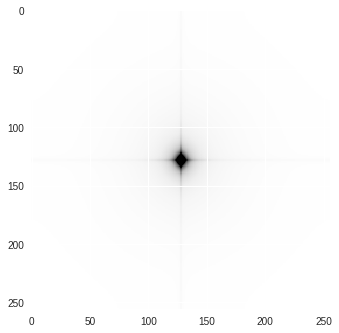

In [115]:
unshifted = np.load("ffts_256/all_mean_fft_unshifted.npy")
shifted = np.fft.fftshift(unshifted)
plt.imshow(shifted, vmax = 500)

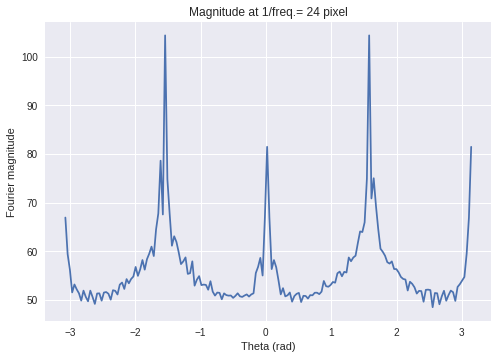

In [116]:
theta,value = get_circle(np.fft.fftshift(unshifted), tol = 3)
binned_value, binned_theta, _ = binned_statistic(theta,value,bins = 180)
plt.plot(binned_theta[1:],binned_value)
plt.xlabel("Theta (rad)")
plt.title("Magnitude at 1/freq.= 24 pixel")
plt.ylabel("Fourier magnitude")

### Now rotated

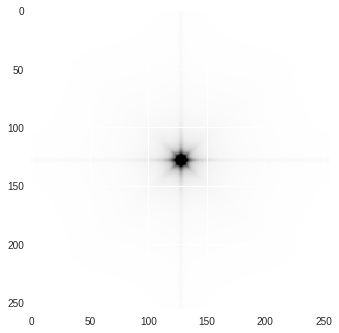

In [117]:
unshifted = np.load("ffts_256_rotated_45/all_mean_fft_unshifted.npy")
shifted = np.fft.fftshift(unshifted)
plt.imshow(shifted, vmax = 500)

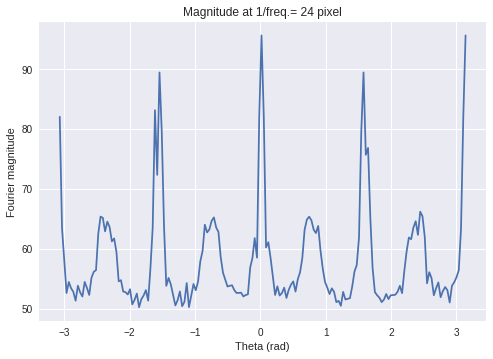

In [118]:
theta,value = get_circle(np.fft.fftshift(unshifted), tol = 3)
binned_value, binned_theta, _ = binned_statistic(theta,value,bins = 180)
plt.plot(binned_theta[1:],binned_value)
plt.xlabel("Theta (rad)")
plt.title("Magnitude at 1/freq.= 24 pixel")
plt.ylabel("Fourier magnitude")

## Test hamming-filtered images

(-0.5, 223.5, 223.5, -0.5)

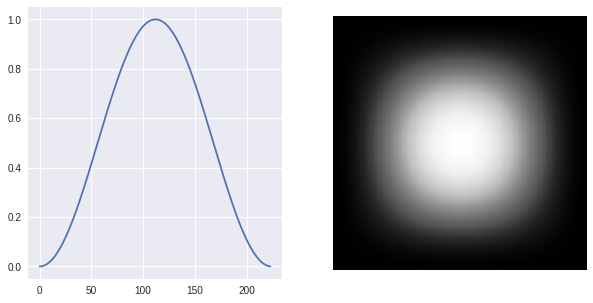

In [161]:
hamm = torch.hamming_window(224, periodic=True, alpha=0.5, beta=0.5,)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(hamm)
plt.subplot(122)
hamm_2d = torch.matmul(hamm[None].transpose(0,1), hamm[None])
plt.imshow(1-hamm_2d)
plt.axis('off')

In [252]:
!ls unit_tests

hamming


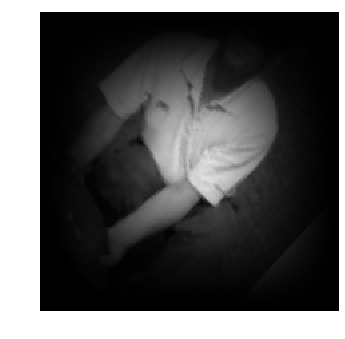

In [289]:
for i in range(1):
    im = plt.imread("unit_tests/hamming/{}.png".format(i))
    plt.imshow(im)
    plt.axis('off')
    plt.show()

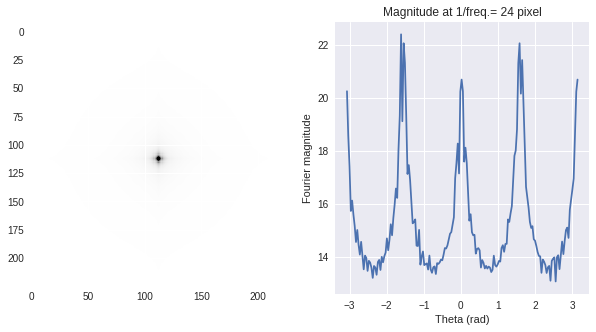

In [170]:
unshifted = np.load("dft_hamming_unrotated/all_mean_fft_unshifted.npy")
shifted = np.fft.fftshift(unshifted)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(shifted, vmax = 500)
plt.subplot(122)
theta,value = get_circle(np.fft.fftshift(unshifted), tol = 3)
binned_value, binned_theta, _ = binned_statistic(theta,value,bins = 180)
plt.plot(binned_theta[1:],binned_value)
plt.xlabel("Theta (rad)")
plt.title("Magnitude at 1/freq.= 24 pixel")
plt.ylabel("Fourier magnitude")

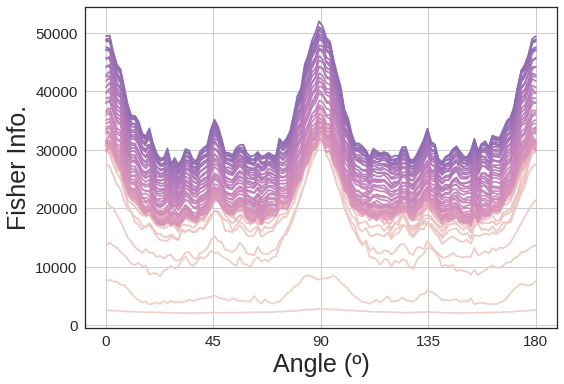

In [240]:
folder = 'fisher_alexnet_layer3_hamming'

epochs = !ls $folder/
all_fishers = {}
for i, pickled_fisher in enumerate(epochs):
    if pickled_fisher.split('_')[0] == 'fisher':
        epoch = pickled_fisher.split('_')[2].split('.')[0]
        fisher = [o.item() for o in pickle.load(open(folder +'/'+pickled_fisher,'rb'))]
        all_fishers[int(epoch)] = np.sqrt(fisher)

all_fishers = pd.DataFrame(all_fishers).sort_index(axis=1)
all_fishers.head()

# plt.figure(figsize = (10,8))
for c in all_fishers.columns:
#     print(c)
    plt.plot(np.linspace(0, 180, 120), all_fishers[c],c=cs[int(c)], label = c)
# plt.legend()
plt.xticks(np.linspace(0, 180, 5))
plt.xlabel("Angle (º)")
plt.grid()
plt.ylabel("Fisher Info.")
plt.tight_layout()
# plt.savefig("figures/Alexnet_fisher_L3.pdf")
plt.show()

In [243]:
all_fishers.shape

(120, 61)

## Test hamming-filtered images rotated by 30

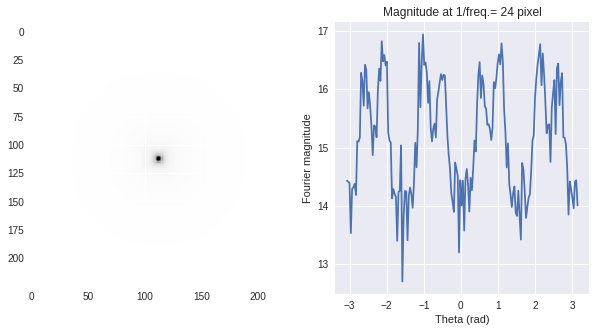

In [171]:
unshifted = np.load("dft_hamming_rotated_30/all_mean_fft_unshifted.npy")
shifted = np.fft.fftshift(unshifted)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(shifted, vmax = 500)
plt.subplot(122)
theta,value = get_circle(np.fft.fftshift(unshifted), tol = 3)
binned_value, binned_theta, _ = binned_statistic(theta,value,bins = 180)
plt.plot(binned_theta[1:],binned_value)
plt.xlabel("Theta (rad)")
plt.title("Magnitude at 1/freq.= 24 pixel")
plt.ylabel("Fourier magnitude")

## Test hamming-filtered images rotated by 45

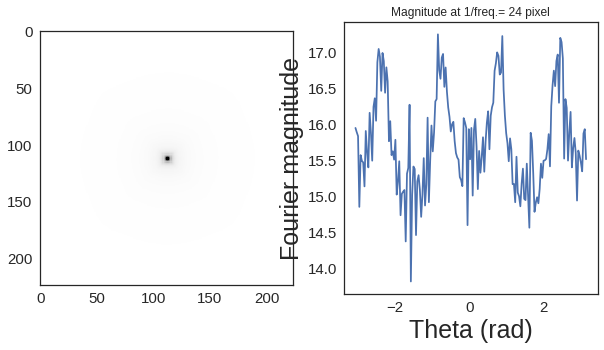

In [236]:
unshifted = np.load("dft_hamming_rotated_45/all_mean_fft_unshifted.npy")
shifted = np.fft.fftshift(unshifted)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(shifted, vmax = 500)
plt.subplot(122)
theta,value = get_circle(np.fft.fftshift(unshifted), tol = 3)
binned_value, binned_theta, _ = binned_statistic(theta,value,bins = 180)
plt.plot(binned_theta[1:],binned_value)
plt.xlabel("Theta (rad)")
plt.title("Magnitude at 1/freq.= 24 pixel")
plt.ylabel("Fourier magnitude")

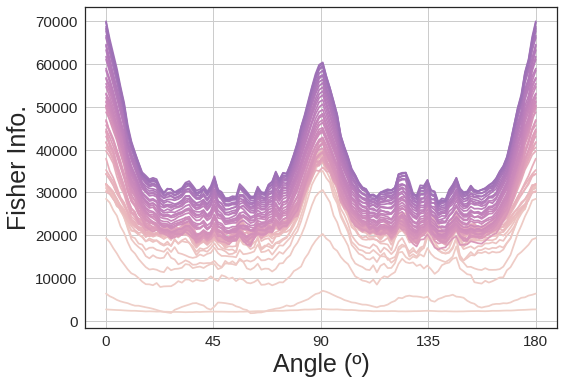

In [342]:
folder = 'alexnet_hamming_r45/fisher_alexnet_layer3_hamming_r45'

epochs = !ls $folder/
all_fishers = {}
for i, pickled_fisher in enumerate(epochs):
    if pickled_fisher.split('_')[0] == 'fisher':
        epoch = pickled_fisher.split('_')[2].split('.')[0]
        fisher = [o.item() for o in pickle.load(open(folder +'/'+pickled_fisher,'rb'))]
        all_fishers[int(epoch)] = np.sqrt(fisher)

all_fishers = pd.DataFrame(all_fishers).sort_index(axis=1)
all_fishers.head()


for c in all_fishers.columns:
#     print(c)
    plt.plot(np.linspace(0, 180, 120), all_fishers[c],c=cs[int(c)], label = c)
# plt.legend()
plt.xticks(np.linspace(0, 180, 5))
plt.xlabel("Angle (º)")
plt.grid()
plt.ylabel("Fisher Info.")
plt.tight_layout()
# plt.savefig("figures/Alexnet_fisher_L3.pdf")
plt.show()

## With the circular convoltional filters (images rotated by 45)

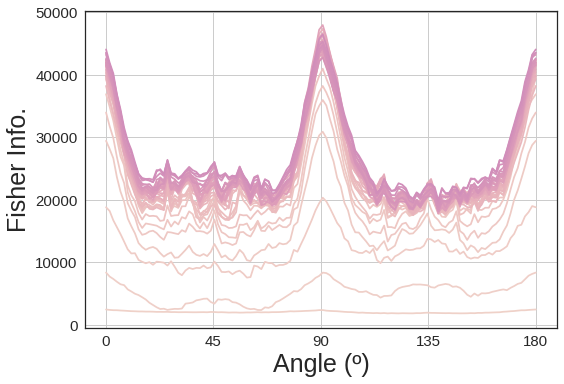

In [343]:
folder = 'alexnet_hamming_circ_r45/fisher_alexnet_layer3_hamming_r45_circ/'

epochs = !ls $folder/
all_fishers = {}
for i, pickled_fisher in enumerate(epochs):
    if pickled_fisher.split('_')[0] == 'fisher':
        epoch = pickled_fisher.split('_')[2].split('.')[0]
        fisher = [o.item() for o in pickle.load(open(folder +'/'+pickled_fisher,'rb'))]
        all_fishers[int(epoch)] = np.sqrt(fisher)

all_fishers = pd.DataFrame(all_fishers).sort_index(axis=1)
all_fishers.head()


for c in all_fishers.columns:
#     print(c)
    plt.plot(np.linspace(0, 180, 120), all_fishers[c],c=cs[int(c)], label = c)
# plt.legend()
plt.xticks(np.linspace(0, 180, 5))
plt.xlabel("Angle (º)")
plt.grid()
plt.ylabel("Fisher Info.")
plt.tight_layout()
# plt.savefig("figures/Alexnet_fisher_L3.pdf")
plt.show()

## With no cardinals

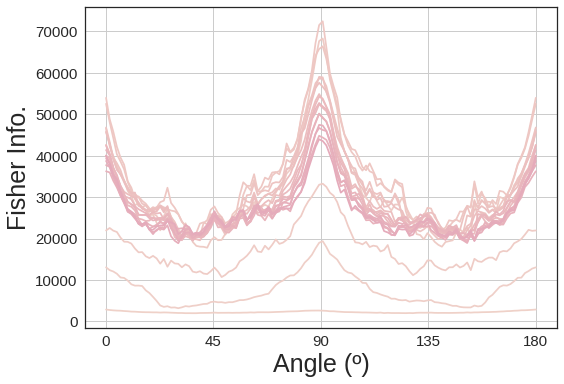

In [344]:
folder = 'alexnet_hamming_cardinalFilter/fisher_layer3'

epochs = !ls $folder/
all_fishers = {}
for i, pickled_fisher in enumerate(epochs):
    if pickled_fisher.split('_')[0] == 'fisher':
        epoch = pickled_fisher.split('_')[2].split('.')[0]
        fisher = [o.item() for o in pickle.load(open(folder +'/'+pickled_fisher,'rb'))]
        all_fishers[int(epoch)] = np.sqrt(fisher)

all_fishers = pd.DataFrame(all_fishers).sort_index(axis=1)
all_fishers.head()


for c in all_fishers.columns:
#     print(c)
    plt.plot(np.linspace(0, 180, 120), all_fishers[c],c=cs[int(c)], label = c)
# plt.legend()
plt.xticks(np.linspace(0, 180, 5))
plt.xlabel("Angle (º)")
plt.grid()
plt.ylabel("Fisher Info.")
plt.tight_layout()
# plt.savefig("figures/Alexnet_fisher_L3.pdf")
plt.show()

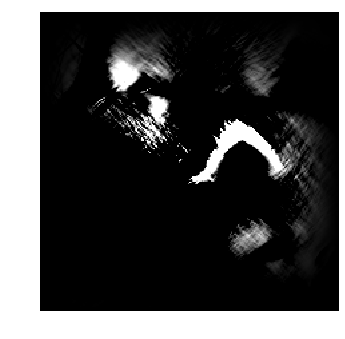

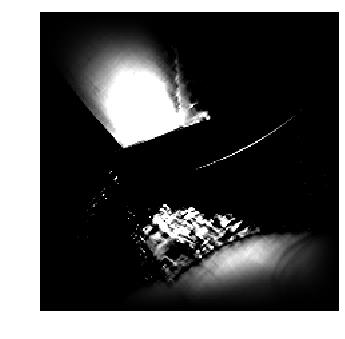

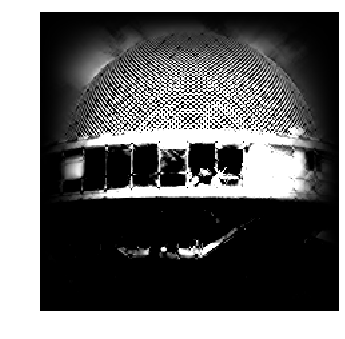

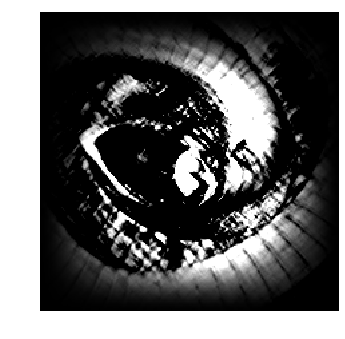

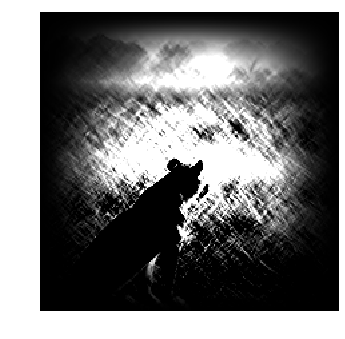

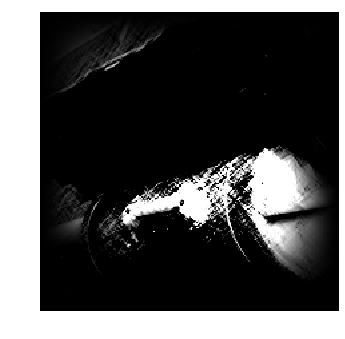

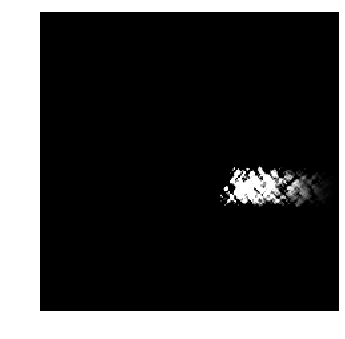

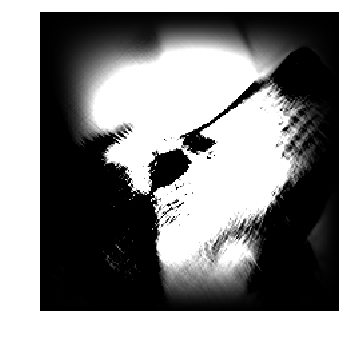

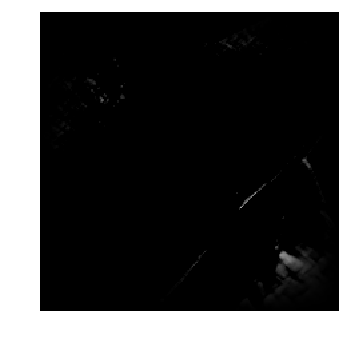

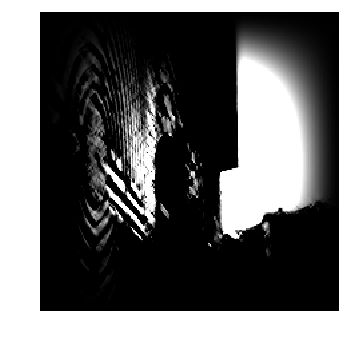

In [308]:
for i in range(10):
    im = plt.imread("alexnet_hamming_cardinalFilter/unit_test_img_{}.png".format(i))
    plt.imshow(im)
    plt.axis('off')
    plt.show()

## Basement

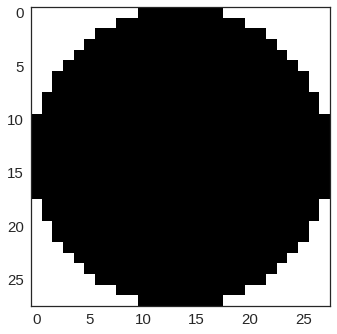

In [246]:
mask = torch.zeros(28,28
                  )
def make_circle(mask):
    """From a 2d array of all zeros we make the center ellipse all 1s, zeros outside"""
    s = mask.size()
    for row in torch.arange(0,s[0], dtype = torch.float):
        for col in torch.arange(0,s[1],dtype = torch.float):
            dist =  torch.sqrt(((.5+row-s[0]/2)**2)/(s[0]/2)**2 + ((.5+col-s[1]/2)**2)/(s[1]/2)**2)
            if dist < 1:
                mask[int(row),int(col)] = 1
    return mask
mask = make_circle(mask)
plt.imshow(mask)

In [248]:
from scipy.io import loadmat
filt = loadmat("img_orient_filter.mat")

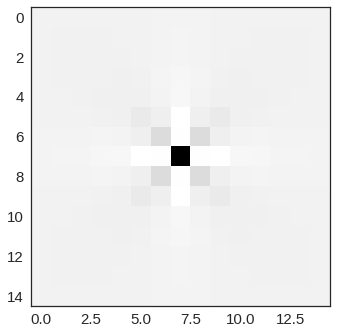

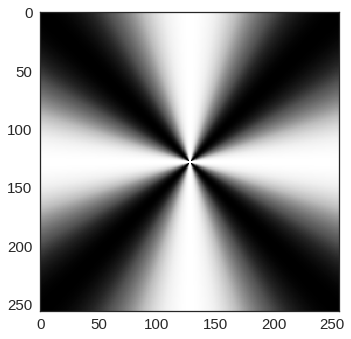

In [251]:
plt.imshow(filt['spatial_kernel'])
plt.show()
plt.imshow(filt['freq_passband'])

In [255]:
filt_to_conv = torch.Tensor(filt['spatial_kernel'])

In [265]:
from torch.nn import functional as F

In [297]:
weight = filt_to_conv.expand(3,3,15,15)
weight.size()

torch.Size([3, 3, 15, 15])

In [298]:
im_ =torch.Tensor(im).permute(2,0,1)[None]
im_.size()

torch.Size([1, 3, 224, 224])

In [304]:
F.conv2d(im_,weight, padding=7).size()

torch.Size([1, 3, 224, 224])

In [325]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.utils import save_image

def rotate_img(img):
        return transforms.functional.rotate(img, 0)
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])    
    
train_dataset = datasets.ImageFolder(
        "/home/abenjamin/nongaussianity/data/imagenet/",
        transforms.Compose([
            transforms.Resize(300),
            transforms.RandomHorizontalFlip(),
            rotate_img,
            transforms.CenterCrop(224),
            transforms.ToTensor(),
#             normalize,
        ]))

train_sampler = None

train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=6, shuffle=False,
        num_workers=1, pin_memory=True, sampler=train_sampler)

   
# things
hamm = torch.hamming_window(224, periodic=True, alpha=0.5, beta=0.5,)
hamm_2d = torch.matmul(hamm[None].transpose(0,1), hamm[None])#.cuda(args.gpu, non_blocking=True)
filt = torch.Tensor(loadmat("alexnet_hamming_cardinalFilter/img_orient_filter.mat")['spatial_kernel']).expand(3,3,15,15).contiguous()#.cuda(args.gpu, non_blocking=True)

In [336]:
filt = torch.Tensor(loadmat("alexnet_hamming_cardinalFilter/img_orient_filter.mat")['spatial_kernel']).expand(3,1,15,15).contiguous()#.cuda(args.gpu, non_blocking=True)

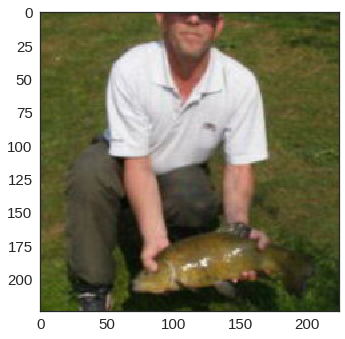

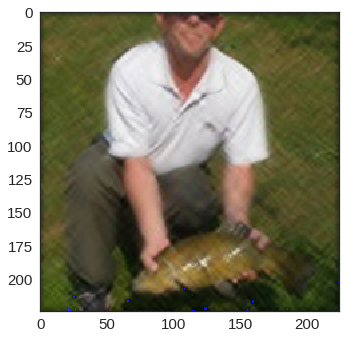

In [338]:
for i, (images, target) in enumerate(train_loader):
        # measure data loading time      
    for j in range(1):
        plt.imshow(images[j].permute(1,2,0))
        plt.show()
        
#     images = images * hamm_2d
#     for j in range(1):
#         plt.imshow(images[j].permute(1,2,0))
#         plt.show()

    images = F.conv2d(images,filt, padding=7,groups=3)

    for j in range(1):
        plt.imshow(images[j].permute(1,2,0))
        plt.show()
    break